In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result = np.zeros((180,800))
i=0

In [3]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[248:344,600:1400]
        latt = latt[248:344,600:1400]
        #plotvar = plotvar[50,220:340,600:1400]
        plotvar = plotvar[50,248:344,600:1400]
        #plotvar.mask = ma.nomask
        #plotvar[plotvar >300] = np.nan
        #plotvar.mask = ma.nomask
        aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result[i,:] = aveplot[:]
        
        i = i + 1

In [4]:
A = np.arange(180)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [17]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([10,20,30,40,50,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#nice_levels = [10,20,30,40,50,60,70,80,90,100,110]
nice_levels = [-1,-0.95,-0.9,-0.85,-0.8,-0.75,-0.7,-0.65,-0.6,-0.55,-0.5,-0.45,-0.4,-0.35,-0.3,-0.25,-0.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """


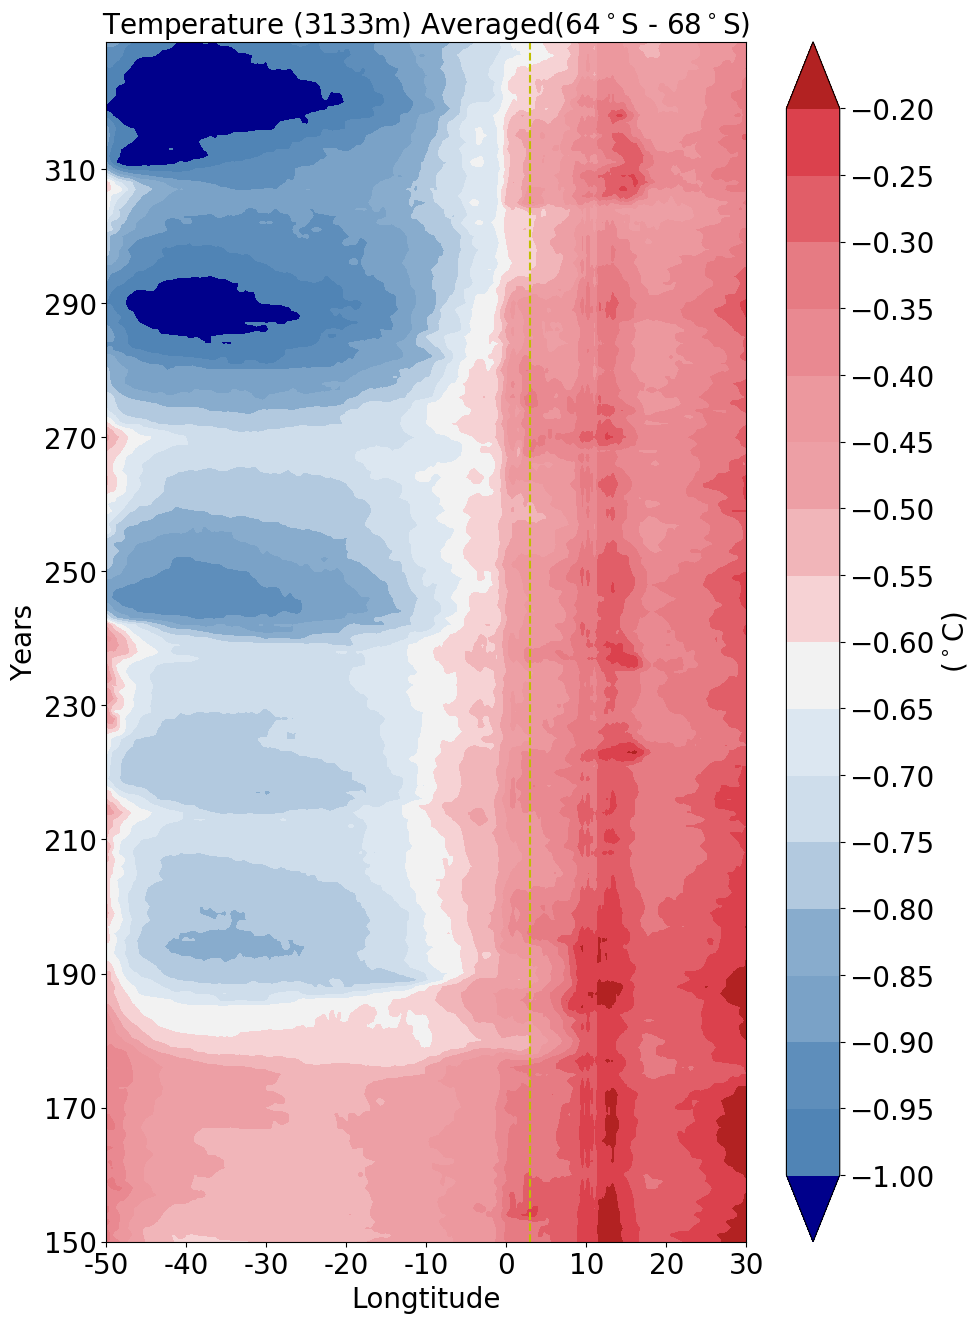

In [20]:
# plot the result
fig = plt.figure(figsize=(10, 15),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
plt.vlines(530, 0, 179, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('($^\circ$C)', **my_font)
cbar.cmap.set_over('firebrick')
cbar.cmap.set_under('darkblue')
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,801,100), ['-50','-40','-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,180,20), ['150', '170', '190', '210', '230','250','270','290','310','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Temperature (3133m) Averaged(64$^\circ$S - 68$^\circ$S)',**my_font)
plt.savefig("tem3133m.png")